<a href="https://colab.research.google.com/github/shirish-baral/python-code-diary/blob/main/unsupervised_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset (using an example complex dataset - Penguins dataset)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop missing values
df.dropna(inplace=True)

# Encoding categorical variables
df['species'] = df['species'].astype('category').cat.codes
df['island'] = df['island'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes

# Selecting features for clustering
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'island', 'sex']]
X_scaled = StandardScaler().fit_transform(X)

# Applying PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

K-Means Silhouette Score: 0.41888312981603976


In [9]:
# K-Medians Clustering
kmedians = KMedoids(n_clusters=3, metric='manhattan', random_state=42)
kmedians_labels = kmedians.fit_predict(X_scaled)
print("K-Medians Silhouette Score:", silhouette_score(X_scaled, kmedians_labels))

K-Medians Silhouette Score: 0.41715784583010623


In [10]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

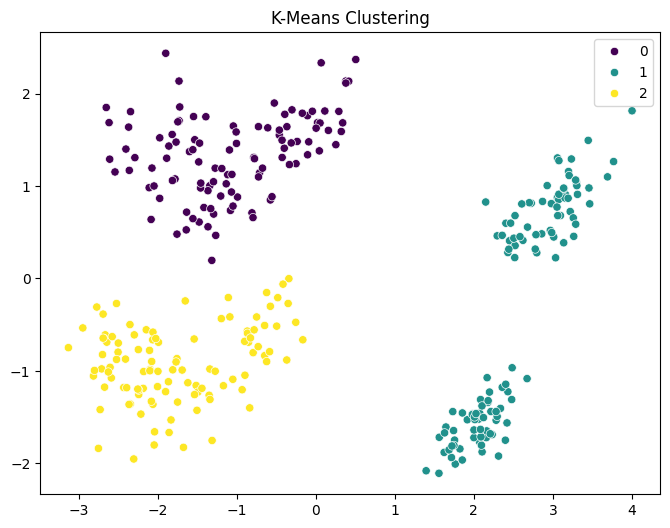

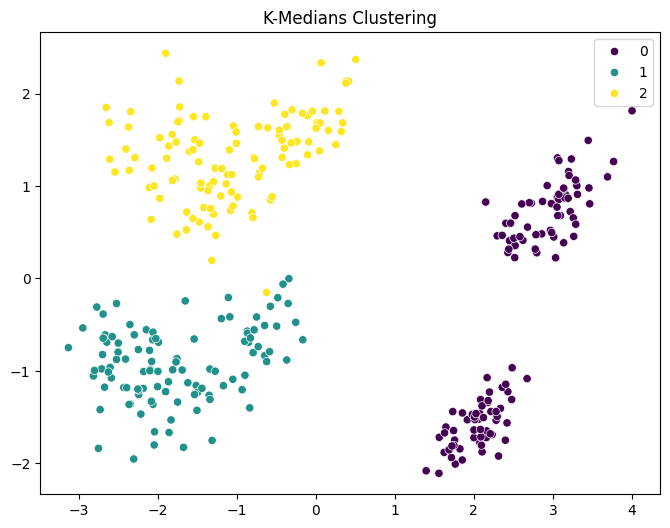

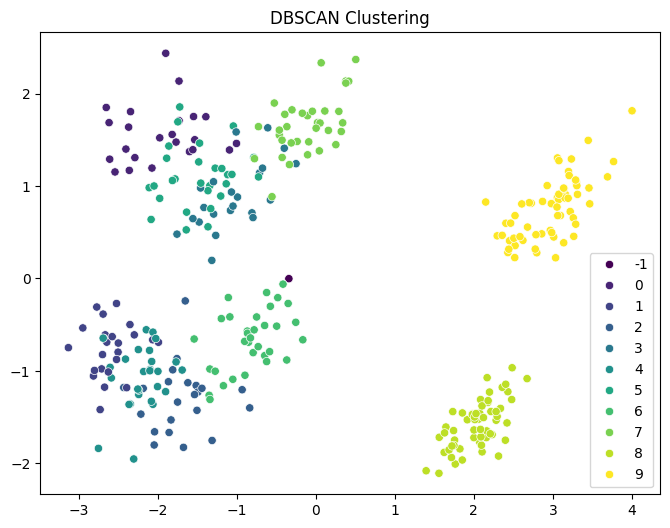

In [11]:
# Visualizing Clusters
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.show()

plot_clusters(X_pca, kmeans_labels, "K-Means Clustering")
plot_clusters(X_pca, kmedians_labels, "K-Medians Clustering")
plot_clusters(X_pca, dbscan_labels, "DBSCAN Clustering")